In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
# Load data
lefse = pd.read_csv('lefse_de_output_B.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(10)

# lefse = lefse.sort_values(by='LDAscore', ascending=True)
# lefse  = lefse.sort_values(by='LDAscore', ascending=False).head(10)
# Define the condition to filter the data (e.g., Category == 'X')
lefse

,Feature,Pvalues,FDR,Y,O,LDAscore,abs_LDAscore
14,A2,0.014171,0.048183,1084400.0,276930.00,5.61,5.61
5,Alistipes,0.001730,0.014707,667650.0,178.32,5.52,5.52
2,Bacteroides,0.000601,0.010213,0.0,532810.00,-5.43,5.43
9,Ruminiclostridium_5,0.004509,0.020904,180600.0,39373.00,4.85,4.85
0,Clostridium_sensu_stricto_1,0.000601,0.010213,0.0,56241.00,-4.45,4.45
17,Ruminiclostridium_6,0.028013,0.079370,14765.0,56384.00,-4.32,4.32
1,Anaerosporobacter,0.000601,0.010213,0.0,39908.00,-4.30,4.30
6,Tyzzerella_3,0.002953,0.020904,9254.7,43938.00,-4.24,4.24
11,Ruminiclostridium_9,0.006646,0.028246,56090.0,85878.00,-4.17,4.17
13,Butyricicoccus,0.010821,0.039419,1578.1,18010.00,-3.91,3.91


In [3]:
# Specify the columns to consider for finding the max
columns_to_check = ['Y', 'O']
# Find the column with the maximum value for each row
lefse['Response'] = lefse[columns_to_check].idxmax(axis=1)
lefse


,Feature,Pvalues,FDR,Y,O,LDAscore,abs_LDAscore,Response
14,A2,0.014171,0.048183,1084400.0,276930.00,5.61,5.61,Y
5,Alistipes,0.001730,0.014707,667650.0,178.32,5.52,5.52,Y
2,Bacteroides,0.000601,0.010213,0.0,532810.00,-5.43,5.43,O
9,Ruminiclostridium_5,0.004509,0.020904,180600.0,39373.00,4.85,4.85,Y
0,Clostridium_sensu_stricto_1,0.000601,0.010213,0.0,56241.00,-4.45,4.45,O
17,Ruminiclostridium_6,0.028013,0.079370,14765.0,56384.00,-4.32,4.32,O
1,Anaerosporobacter,0.000601,0.010213,0.0,39908.00,-4.30,4.30,O
6,Tyzzerella_3,0.002953,0.020904,9254.7,43938.00,-4.24,4.24,O
11,Ruminiclostridium_9,0.006646,0.028246,56090.0,85878.00,-4.17,4.17,O
13,Butyricicoccus,0.010821,0.039419,1578.1,18010.00,-3.91,3.91,O


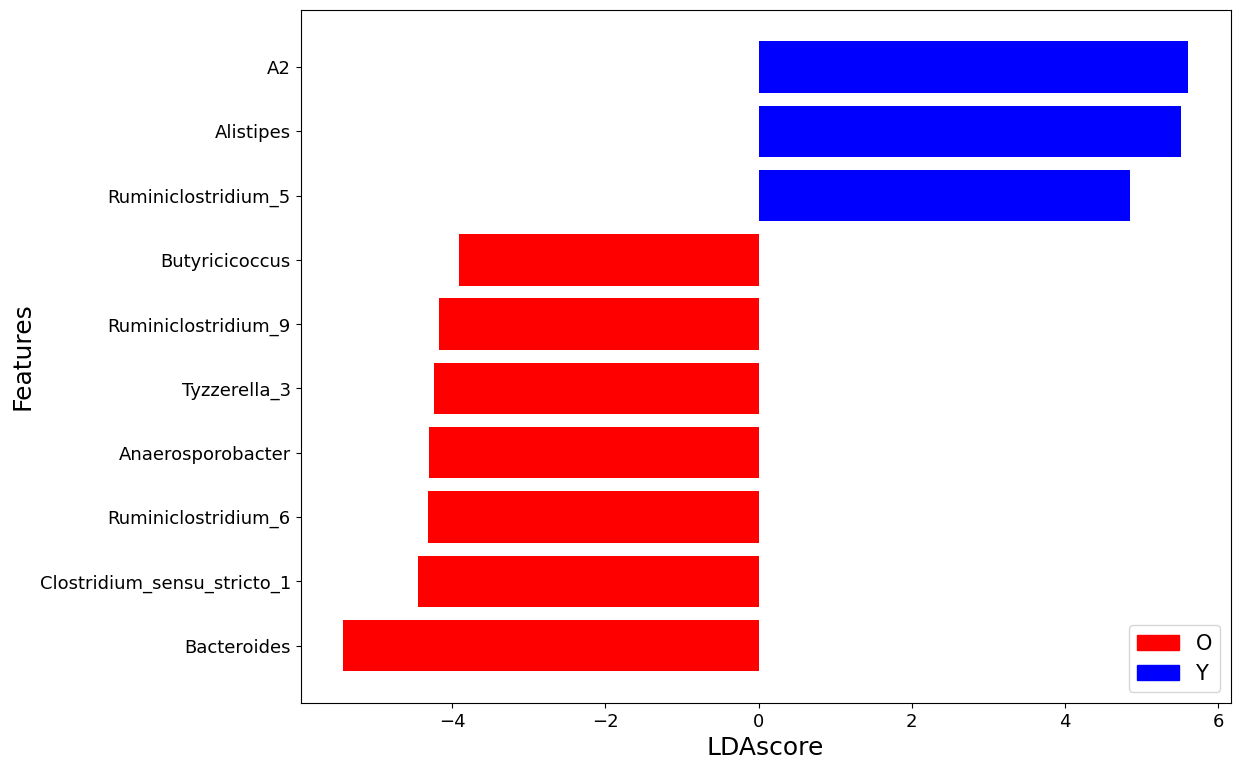

In [4]:
lefse = lefse.sort_values(by='LDAscore', ascending=True)
colors = lefse['Response'].map({'Y': 'blue', 'O': 'red'})
plt.figure(figsize=(12, 9))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse['Feature'], lefse['LDAscore'], color=colors)  # Swap x and y
plt.yticks(fontsize=13) 
plt.xticks(fontsize=13) 
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore',fontsize=18)
plt.ylabel('Features',fontsize=18)

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='O')
blue_patch = mpatches.Patch(color='blue', label='Y')
plt.legend(handles=[red_patch, blue_patch ], loc='lower right',fontsize=15)#title='Response'

plt.show()

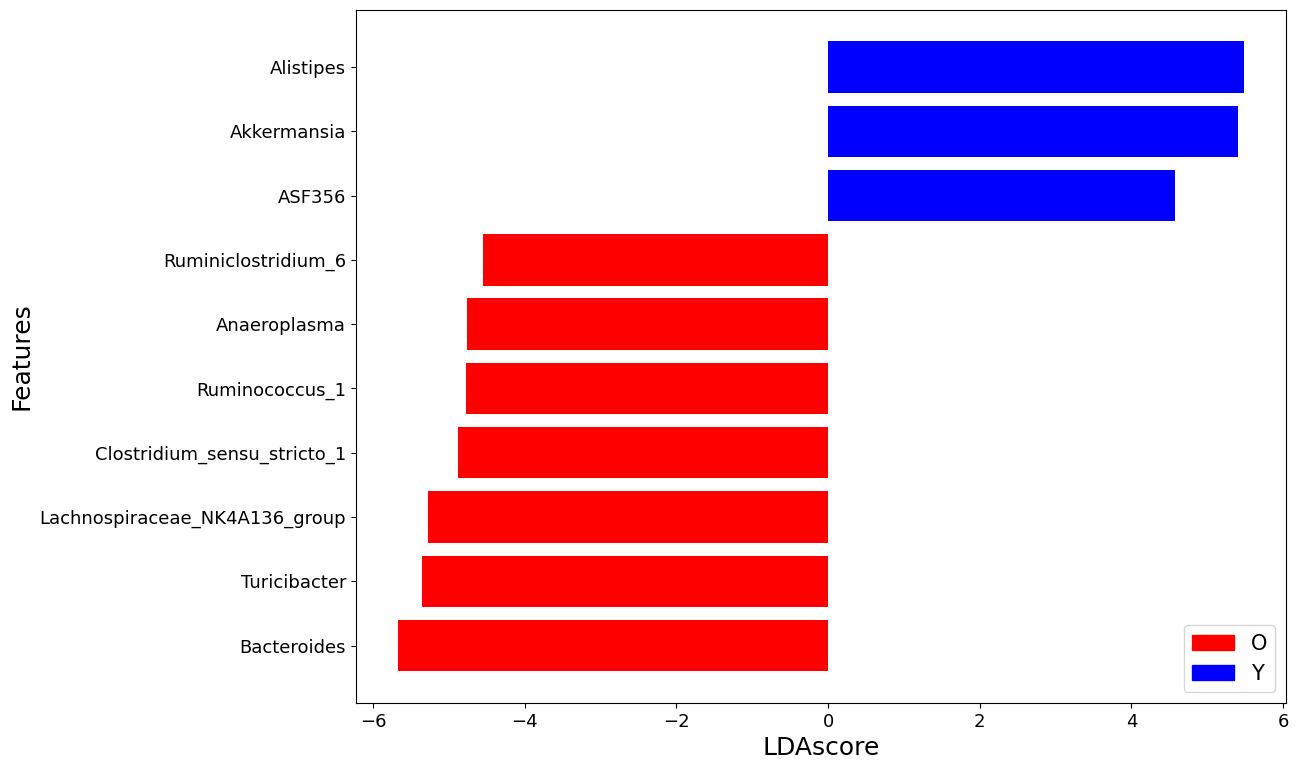

In [5]:
# Load data
lefse = pd.read_csv('lefse_de_output_4.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(10)
columns_to_check = ['Y', 'O']
# Find the column with the maximum value for each row
lefse['Response'] = lefse[columns_to_check].idxmax(axis=1)
lefse = lefse.sort_values(by='LDAscore', ascending=True)
colors = lefse['Response'].map({'Y': 'blue', 'O': 'red'})
plt.figure(figsize=(12, 9))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse['Feature'], lefse['LDAscore'], color=colors)  # Swap x and y
plt.yticks(fontsize=13) 
plt.xticks(fontsize=13) 
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore',fontsize=18)
plt.ylabel('Features',fontsize=18)

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='O')
blue_patch = mpatches.Patch(color='blue', label='Y')
plt.legend(handles=[red_patch, blue_patch ], loc='lower right',fontsize=15)#title='Response'

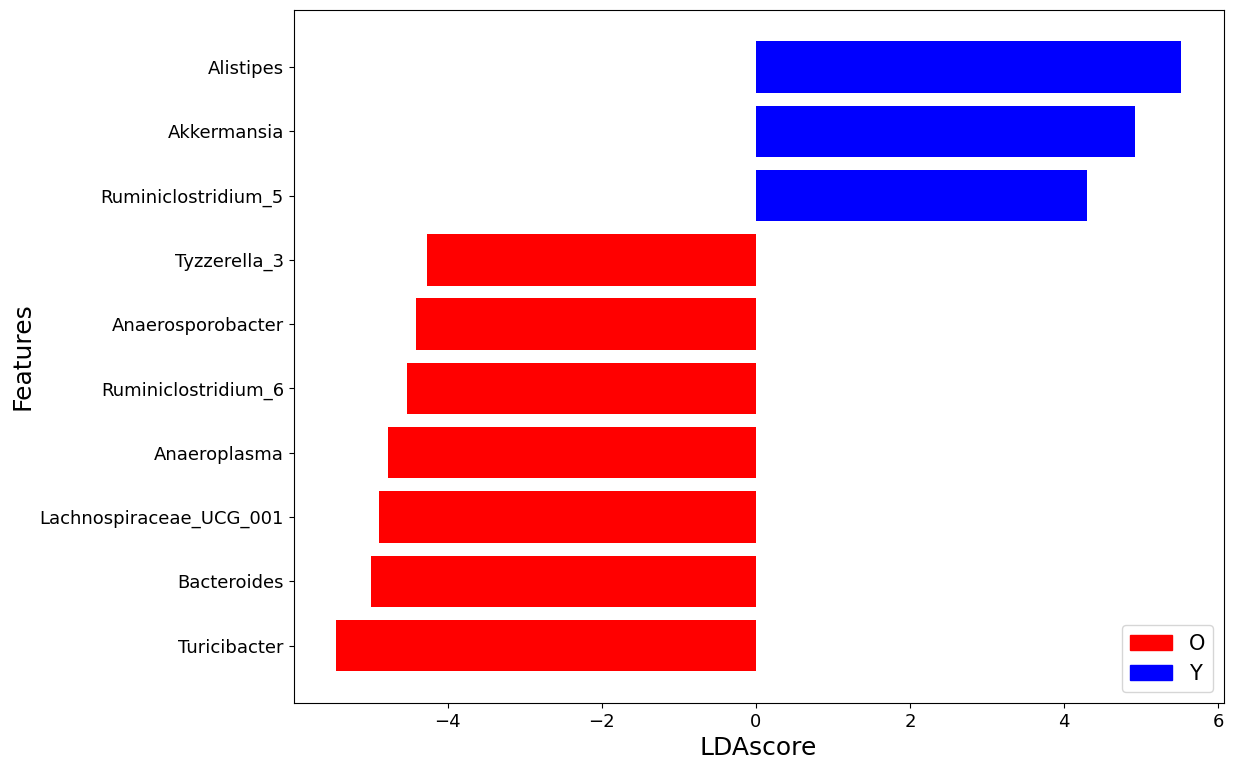

In [6]:
# Load data
lefse = pd.read_csv('lefse_de_output_8.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(10)
columns_to_check = ['Y', 'O']
# Find the column with the maximum value for each row
lefse['Response'] = lefse[columns_to_check].idxmax(axis=1)
lefse = lefse.sort_values(by='LDAscore', ascending=True)
colors = lefse['Response'].map({'Y': 'blue', 'O': 'red'})
plt.figure(figsize=(12, 9))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse['Feature'], lefse['LDAscore'], color=colors)  # Swap x and y
plt.yticks(fontsize=13) 
plt.xticks(fontsize=13) 
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore',fontsize=18)
plt.ylabel('Features',fontsize=18)

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='O')
blue_patch = mpatches.Patch(color='blue', label='Y')
plt.legend(handles=[red_patch, blue_patch ], loc='lower right',fontsize=15)#title='Response'

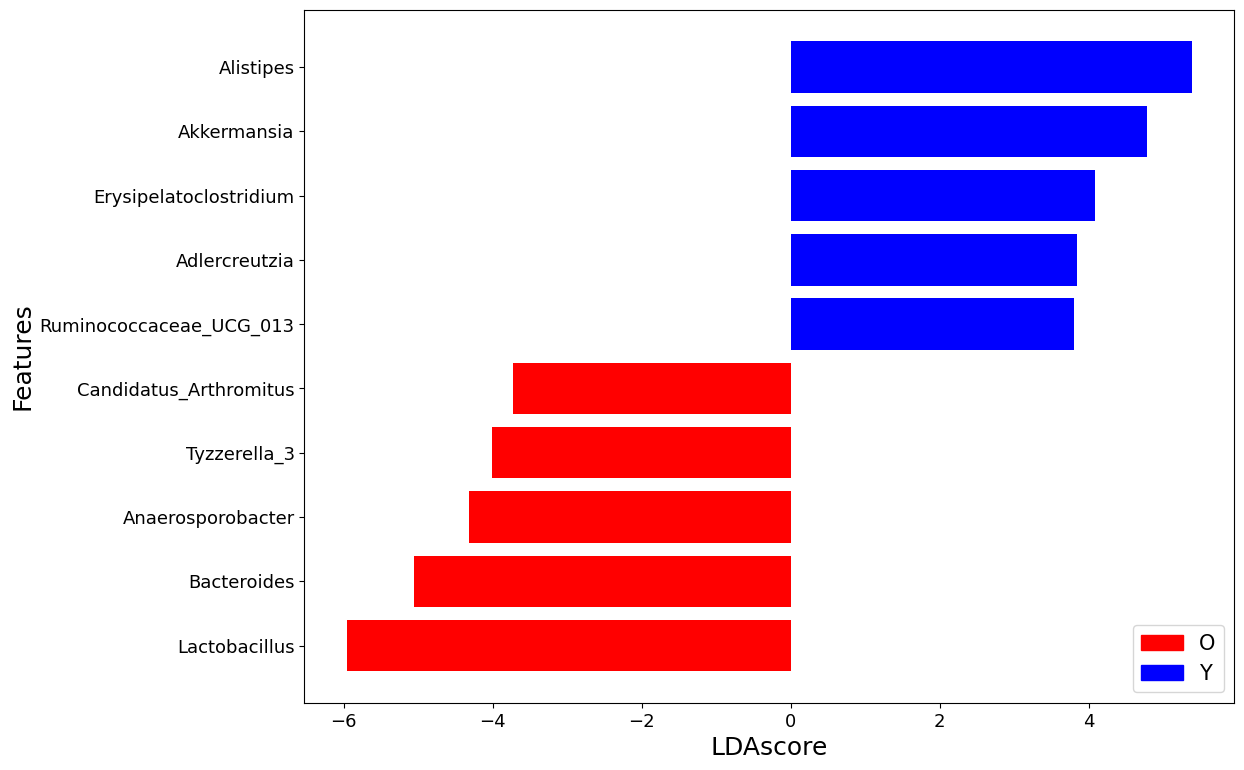

In [7]:
# Load data
lefse = pd.read_csv('lefse_de_output_12.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(10)
columns_to_check = ['Y', 'O']
# Find the column with the maximum value for each row
lefse['Response'] = lefse[columns_to_check].idxmax(axis=1)
lefse = lefse.sort_values(by='LDAscore', ascending=True)
colors = lefse['Response'].map({'Y': 'blue', 'O': 'red'})
plt.figure(figsize=(12, 9))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse['Feature'], lefse['LDAscore'], color=colors)  # Swap x and y
plt.yticks(fontsize=13) 
plt.xticks(fontsize=13) 
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore',fontsize=18)
plt.ylabel('Features',fontsize=18)

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='O')
blue_patch = mpatches.Patch(color='blue', label='Y')
plt.legend(handles=[red_patch, blue_patch ], loc='lower right',fontsize=15)#title='Response'

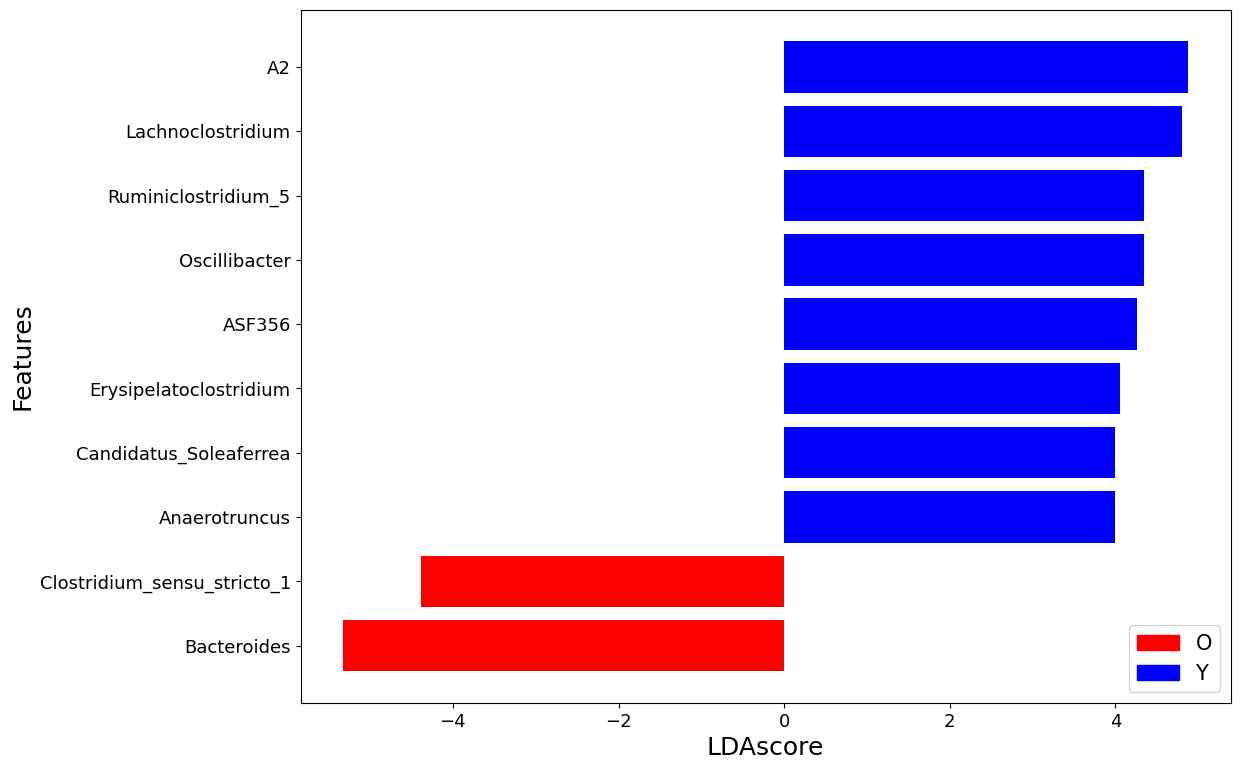

In [8]:
# Load data
lefse = pd.read_csv('lefse_de_output_16.1.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.assign(abs_LDAscore=abs(lefse['LDAscore']))
lefse = lefse.sort_values(by='abs_LDAscore', ascending=False).head(10)
columns_to_check = ['Y', 'O']
# Find the column with the maximum value for each row
lefse['Response'] = lefse[columns_to_check].idxmax(axis=1)
lefse = lefse.sort_values(by='LDAscore', ascending=True)
colors = lefse['Response'].map({'Y': 'blue', 'O': 'red'})
plt.figure(figsize=(12, 9))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse['Feature'], lefse['LDAscore'], color=colors)  # Swap x and y
plt.yticks(fontsize=13) 
plt.xticks(fontsize=13) 
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore',fontsize=18)
plt.ylabel('Features',fontsize=18)

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='O')
blue_patch = mpatches.Patch(color='blue', label='Y')
plt.legend(handles=[red_patch, blue_patch ], loc='lower right',fontsize=15)#title='Response'